In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.misc import factorial
from matplotlib import animation, rc
from IPython.display import HTML
import base64

# Stimulation Generation

In [3]:
# Test Stimulus
x = y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
s = np.shape(X)
nFrames = 20
A = np.zeros((nFrames, s[0], s[1]))
for i in range(1,nFrames+1): 
    A[i-1,:,:] = plt.mlab.bivariate_normal(X, Y, 0.5+i*0.1, 0.5, 1, 1)

In [4]:
# Generating Bar Stimulus Data
radius = 10
precession = 0.1
barWidth = radius / 4
angles = [-90, 45, -180, 315, 90, 225, 0, 135]
nFrames = len(angles)*3



X = Y = np.arange(-radius, radius + precession, precession)
lenngth = len(X)
stim = np.zeros((nFrames, lenngth, lenngth))

f = 0
for angle in angles:
    for k in range(3):
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                if np.sin(np.deg2rad(angle))*x - np.cos(np.deg2rad(angle))*y <= (0.5-0.5*k)*radius + barWidth:
                    if np.sin(np.deg2rad(angle))*x - np.cos(np.deg2rad(angle))*y >= (0.5-0.5*k)*radius - barWidth:
                        stim[f, j, i] = 1
        # updates the frame
        f = f + 1
        

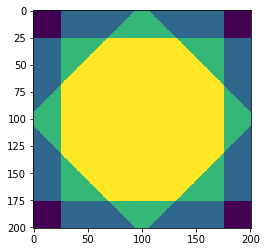

In [5]:
# plot overal visual feild covered
shape2D = (len(X), len(Y))
proj2D = np.zeros(shape2D)
for i in range(nFrames):
    proj2D = proj2D + (stim[i, :, :]).reshape(shape2D)
    
plt.imshow(proj2D)

/home/arash/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter avconv unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


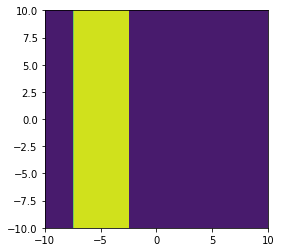

In [6]:
# Set up animation
fig = plt.figure(figsize=(4, 4))
ax = plt.axes()  

# Animation function
def animate(i): 
    z = stim[i,:,:]
    cont = plt.contourf(X, Y, z)

    return cont  

anim = animation.FuncAnimation(fig, animate, frames=nFrames)

anim.save('test.mp4', fps=2, writer='avconv', codec='libx264')

with open('test.mp4', 'rb') as f:
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(base64.b64encode(f.read()).decode('utf-8'))

In [7]:
HTML(video_tag)

# HRF Modelling